<a href="https://colab.research.google.com/github/manju-maurya/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset
In this, there are given several parameters and on the basis of that parameter we have to predict that loan will be approved for a paticular person or not.

In [181]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Importing dataset

In [182]:
df= pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")

In [183]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
df.shape

(614, 13)

In [185]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Preprocessing

In [187]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [188]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [189]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [190]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


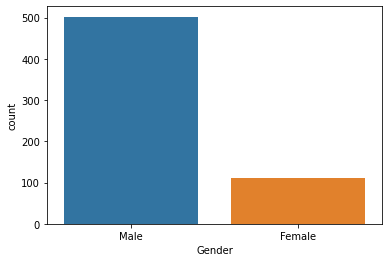

In [191]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


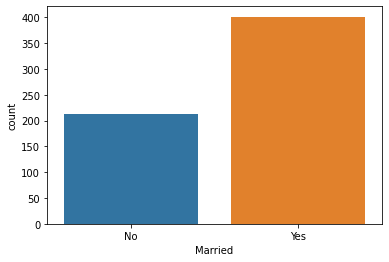

In [192]:
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


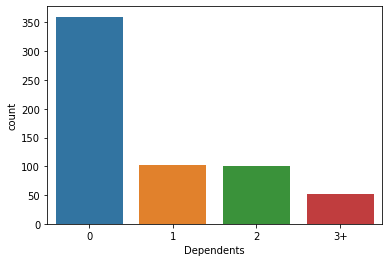

In [193]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


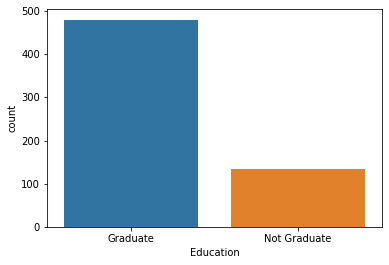

In [194]:
sns.countplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


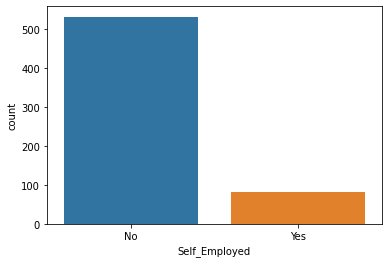

In [195]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


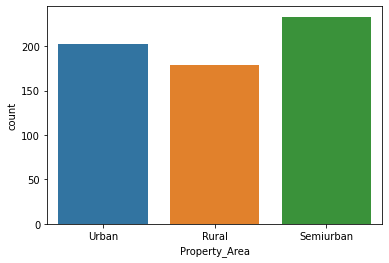

In [196]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


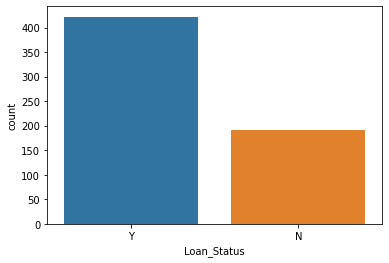

In [197]:
sns.countplot(df['Loan_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


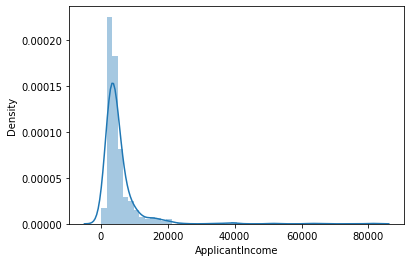

In [198]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


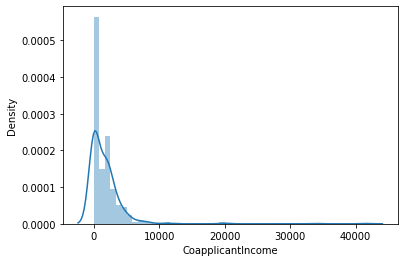

In [199]:
sns.distplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


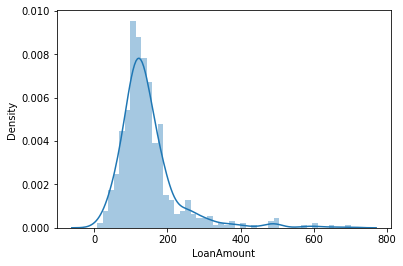

In [200]:
sns.distplot(df['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


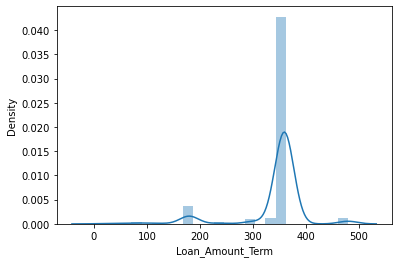

In [201]:
sns.distplot(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


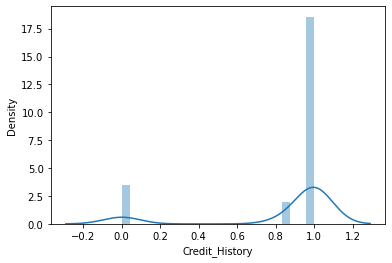

In [202]:
sns.distplot(df['Credit_History'])

In [203]:
#Total income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
447,LP002435,Male,Yes,0,Graduate,No,3539,1376.0,55.0,360.0,1.000000,Rural,N,4915.0
47,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.000000,Urban,Y,5821.0
212,LP001713,Male,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.000000,Urban,Y,7787.0
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,0.842199,Rural,Y,7667.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


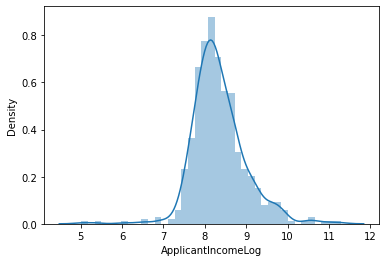

In [204]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


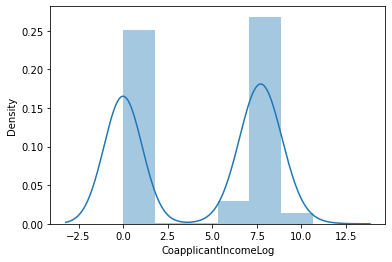

In [205]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


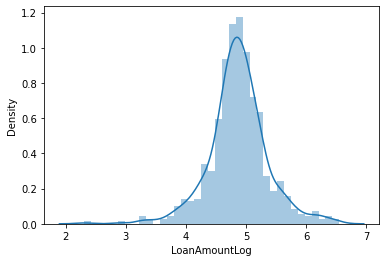

In [206]:
df['LoanAmountLog']=np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


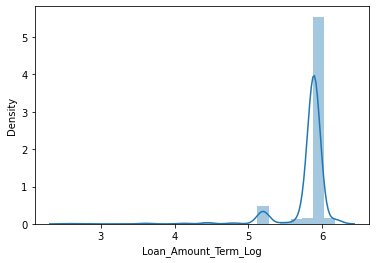

In [207]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


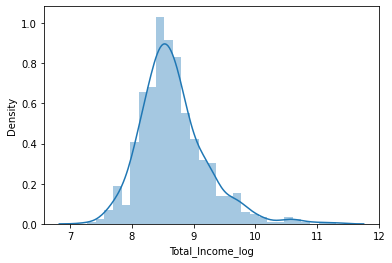

In [208]:
df['Total_Income_log']=np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

In [209]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_log
502,LP002615,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y,10489.0,8.490028,8.634976,5.342334,5.888878,9.258178
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N,4166.0,8.334952,0.000000,4.595120,5.888878,8.334952
445,LP002429,Male,Yes,1,Graduate,Yes,3466,1210.0,130.0,360.0,1.0,Rural,Y,4676.0,8.151045,7.099202,4.875197,5.888878,8.450412


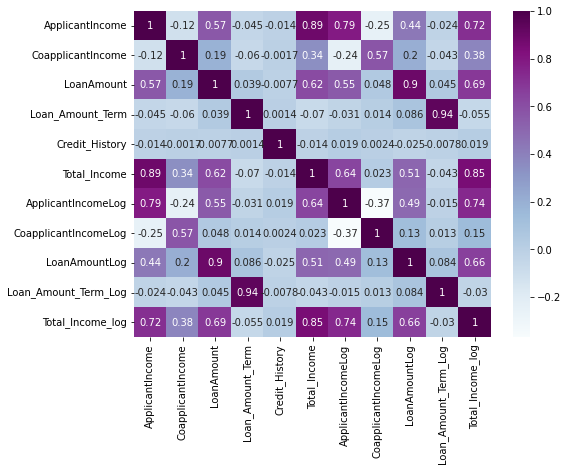

In [210]:
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [211]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
df=df.drop(columns=cols,axis=1)
df.head( )

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


#Label Encoding

In [212]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed',"Property_Area","Loan_Status",'Dependents']
le=LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])

In [213]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


 # Splitting the dataset through Train-Test-split

In [214]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [215]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Building

In [216]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
  model.fit(xtrain,ytrain)
  print("accuracy is ",model.score(xtest,ytest)*100)
  score=cross_val_score(model,x,y,cv=5)
  print('cross validation is ',np.mean(score*100))

In [224]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
classify(model1,x,y)

accuracy is  77.27272727272727
cross validation is  80.9462881514061


In [225]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
classify(model2,x,y)

accuracy is  70.12987012987013
cross validation is  71.5033986405438


In [226]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model3 = RandomForestClassifier()
classify(model3, x, y)

accuracy is  78.57142857142857
cross validation is  78.17806210848994


In [227]:
model4=ExtraTreesClassifier()
classify(model4,x,y)

accuracy is  74.67532467532467
cross validation is  76.38944422231108


## Confusion Matrix

[[ 27  38]
 [  2 118]]


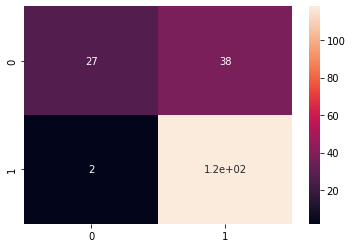

In [231]:
from sklearn.metrics import confusion_matrix
y_pred=model1.predict(xtest)
cm=confusion_matrix(ytest,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

[[ 38  27]
 [ 19 101]]


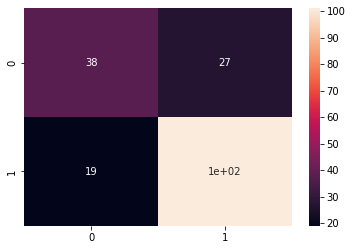

In [232]:
from sklearn.metrics import confusion_matrix
y_pred=model2.predict(xtest)
cm=confusion_matrix(ytest,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

[[ 34  31]
 [  2 118]]


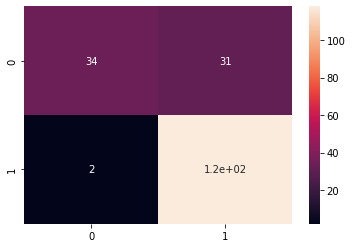

In [233]:
from sklearn.metrics import confusion_matrix
y_pred=model3.predict(xtest)
cm=confusion_matrix(ytest,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

[[ 35  30]
 [  9 111]]


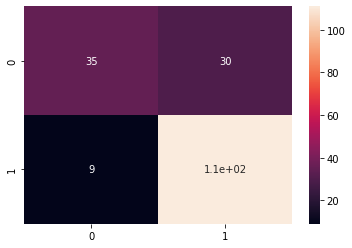

In [234]:
from sklearn.metrics import confusion_matrix
y_pred=model4.predict(xtest)
cm=confusion_matrix(ytest,y_pred)
print(cm)
sns.heatmap(cm,annot=True)